<a href="https://colab.research.google.com/github/kplr-training/Web-Scraping/blob/main/Exercice/3_Web_Scraping_avec_Scrapy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Web Scraping using Scrapy**

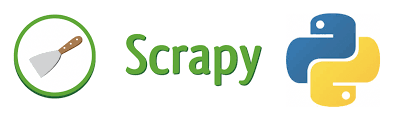

Nous allons scrapper **quotes.toscrape.com** , un site qui rÃ©pertorie des citations d'auteurs cÃ©lÃ¨bres.

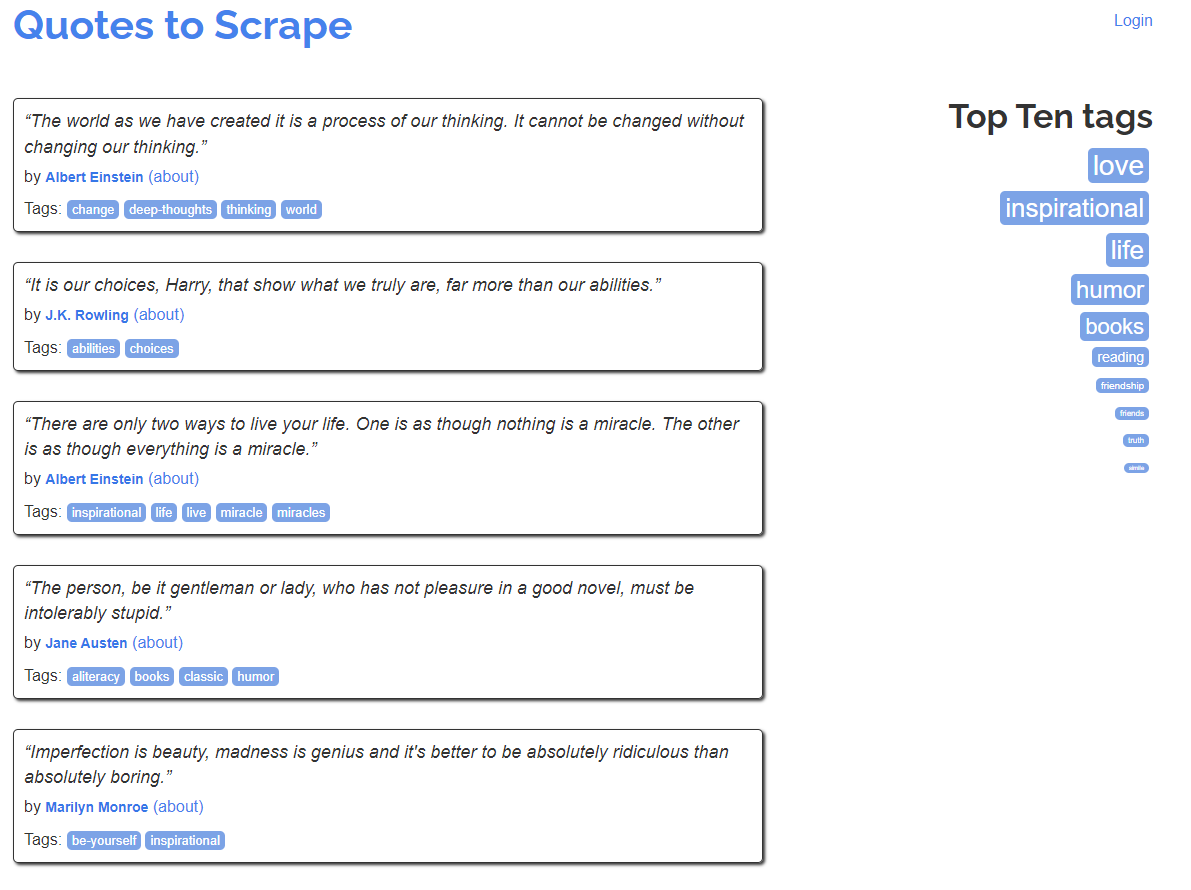

**Ce Workshop vous guidera Ã  travers ces tÃ¢ches :**

1.CrÃ©er un nouveau projet Scrapy

2.Ã‰crire une araignÃ©e pour explorer un site et extraire des donnÃ©es

3.Exporter les donnÃ©es rÃ©cupÃ©rÃ©es Ã  l'aide de la ligne de commande

4.Changer l'araignÃ©e pour suivre rÃ©cursivement les liens

5.Utiliser des arguments d'araignÃ©e

**Installer Scrapy :**

In [ ]:
# install scrapy
!pip install Scrapy

**CrÃ©er un projet**

- Avant de commencer Ã  gscraper, vous devrez configurer un nouveau projet Scrapy.

- Entrez un rÃ©pertoire dans lequel vous souhaitez stocker votre code et exÃ©cutez :

In [ ]:
# create files for learning
!scrapy startproject firstproject

New Scrapy project 'firstproject', using template directory '/usr/local/lib/python3.8/dist-packages/scrapy/templates/project', created in:
    /content/firstproject

You can start your first spider with:
    cd firstproject
    scrapy genspider example example.com


- Cela crÃ©era un rÃ©pertoire 'firstproject' avec le contenu suivant :

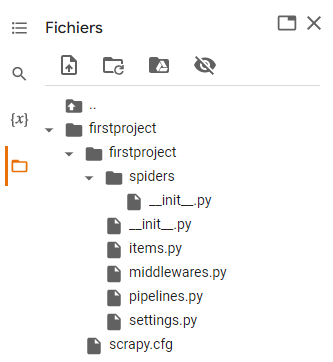

In [ ]:
# get the current working directory
import os
os.getcwd()

'/content'

In [ ]:
# change working directories
os.chdir('/content/firstproject/firstproject/spiders')
os.getcwd()

'/content/firstproject/firstproject/spiders'

# **1 - Extraire les quotes :**

**Notre premier Spider :**

- Les spiders sont des classes que vous dÃ©finissez et que Scrapy utilise pour extraire des informations d'un site Web (ou d'un groupe de sites Web).
- Ils doivent sous-classer Spideret dÃ©finir les requÃªtes initiales Ã  effectuer, Ã©ventuellement comment suivre les liens dans les pages et comment analyser le contenu de la page tÃ©lÃ©chargÃ©e pour extraire des donnÃ©es.

In [ ]:
# create quotes_spider.py and save it under the firstproject/firstproject/spiders directory
%%writefile -a quotes_spider.py
import scrapy


class QuotesSpider(scrapy.Spider):
    name = "quotes"
    start_urls = [
        'https://quotes.toscrape.com/page/1/',
    ]

    def parse(self, response):
        for quote in response.css('div.quote'):
        
            yield {
                'text': quote.css('span.text::text').get(),
                'author': quote.css('small.author::text').get(),
                'tags': quote.css('div.tags a.tag::text').getall(),
            }

        next_page = response.css('li.next a::attr(href)').get()
        if next_page is not None:
            next_page = response.urljoin(next_page)
            yield scrapy.Request(next_page, callback=self.parse)

Writing quotes_spider.py


Comme vous pouvez le voir, notre Spider sous-classe **scrapy.Spider** et dÃ©finit certains attributs et mÃ©thodes :

- **name**: identifie le spider. Il doit Ãªtre unique au sein d'un projet, c'est-Ã -dire que vous ne pouvez pas dÃ©finir le mÃªme nom pour diffÃ©rentes spiders.


- **response.css()** : Le rÃ©sultat de l'exÃ©cution response.css('div.quote')est un objet de type liste appelÃ© SelectorList, qui reprÃ©sente une liste d' Selectorobjets qui entourent les Ã©lÃ©ments XML/HTML et vous permettent d'exÃ©cuter d'autres requÃªtes pour affiner la sÃ©lection ou extraire les donnÃ©es

- **yield** : Un Spider Scrapy gÃ©nÃ¨re gÃ©nÃ©ralement de nombreux dictionnaires contenant les donnÃ©es extraites de la page. Pour ce faire, nous utilisons le yield pour spÃ©cifier ce qu'on veut extraire'



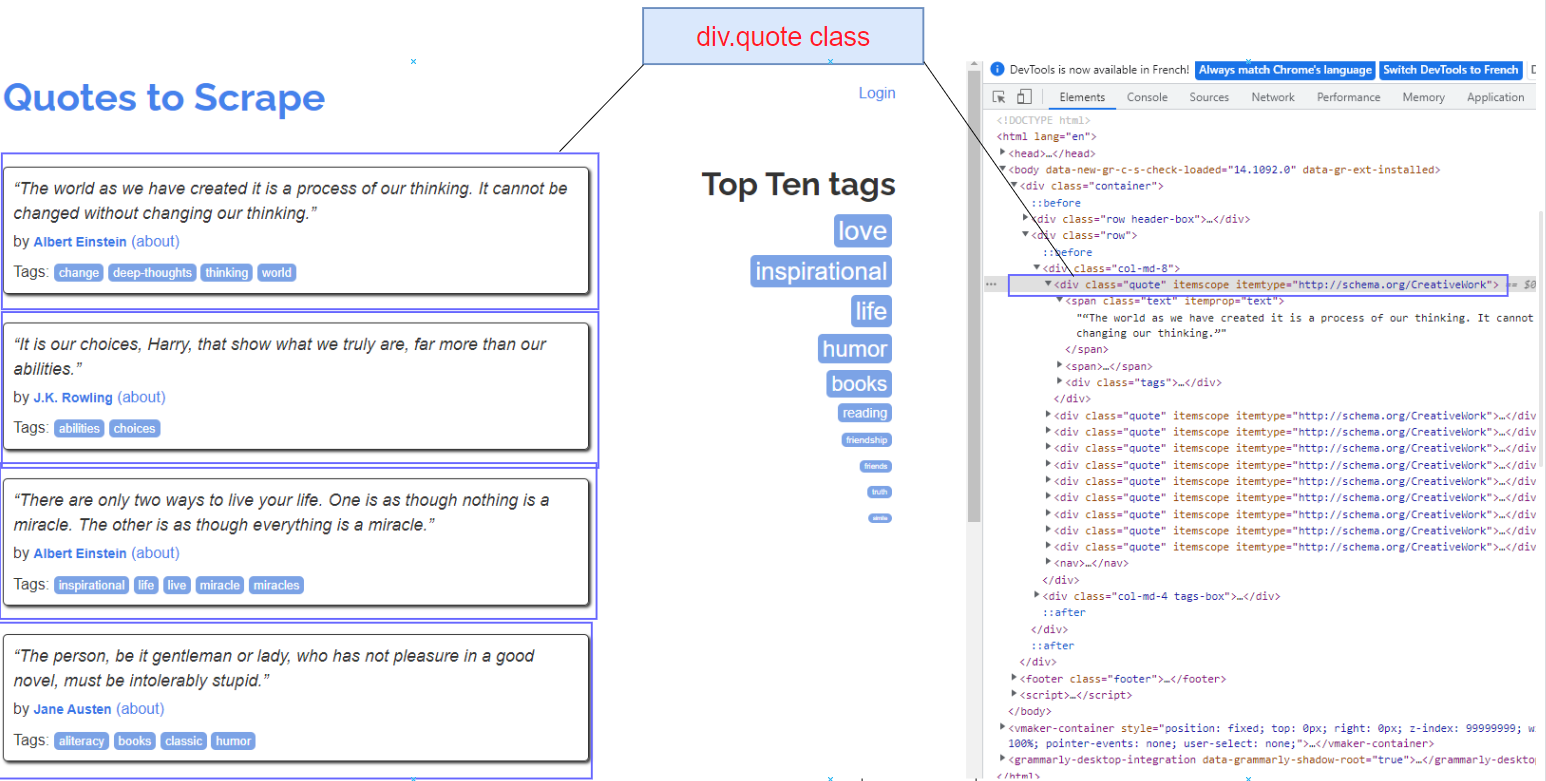

-  la **parse()** mÃ©thode recherche le lien vers la page suivante, construit une URL absolue complÃ¨te Ã  l'aide de la urljoin()mÃ©thode (puisque les liens peuvent Ãªtre relatifs) et gÃ©nÃ¨re une nouvelle requÃªte vers la page suivante, s'enregistrant comme rappel Ã  gÃ©rer l'extraction des donnÃ©es pour la page suivante et de continuer Ã  parcourir toutes les pages.

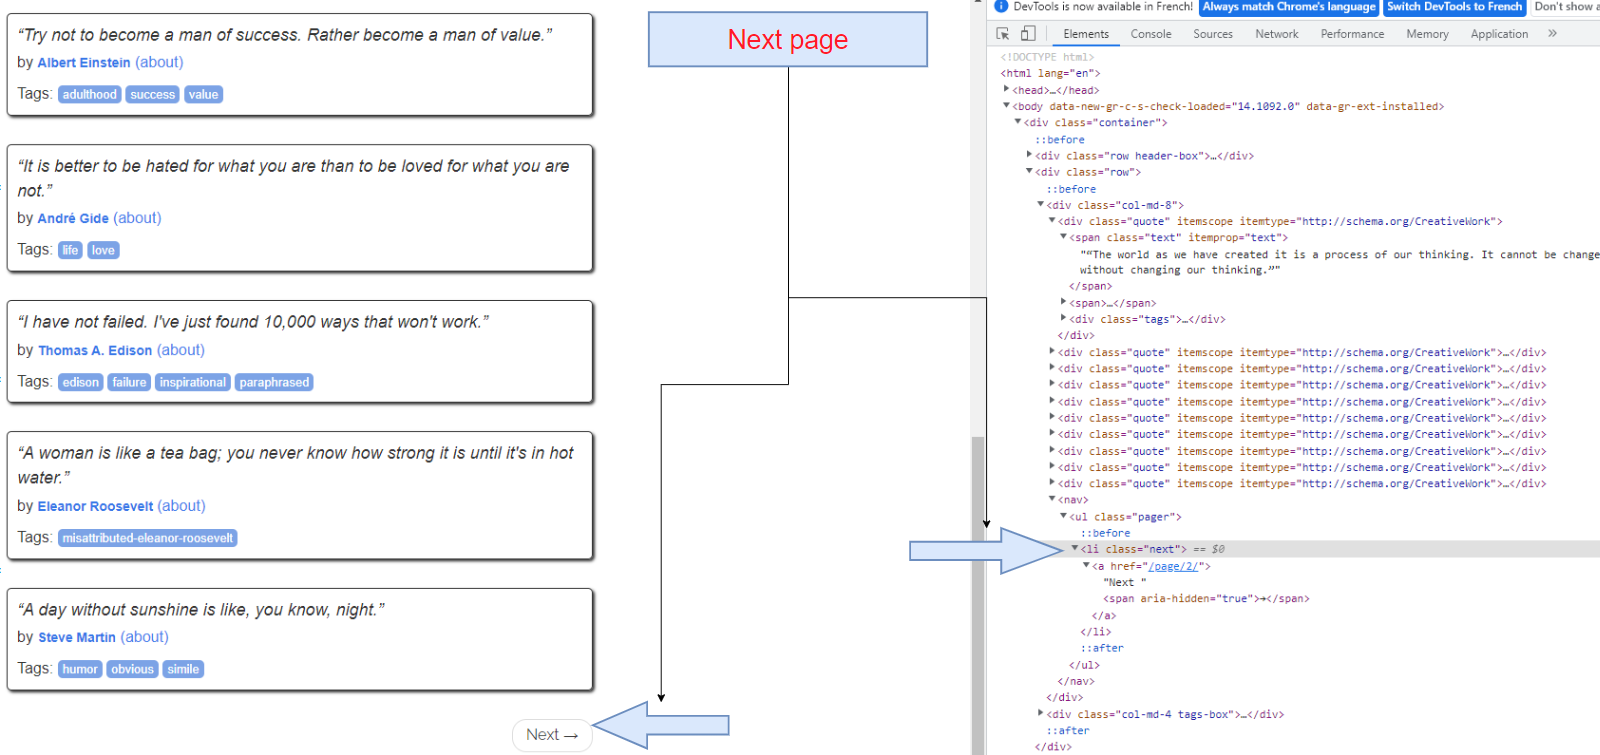

Comment faire fonctionner notre Spider :

- Pour faire fonctionner notre araignÃ©e, accÃ©dez au rÃ©pertoire de niveau supÃ©rieur du projet et exÃ©cutez :

- Cette commande exÃ©cute l'araignÃ©e avec le nom quotesque nous venons d'ajouter, qui enverra des requÃªtes pour le quotes.toscrape.com domaine.

In [ ]:
!scrapy crawl quotes

**Stockage des donnÃ©es scrapÃ©es**

- Le moyen le plus simple de stocker les donnÃ©es extraites consiste Ã  utiliser Feed exports , avec la commande suivante : !scrapy crawl quotes -O quotes.json

- Cela gÃ©nÃ©rera un quotes.json fichier contenant tous les Ã©lÃ©ments rÃ©cupÃ©rÃ©s, sÃ©rialisÃ©s en JSON .

In [ ]:
!scrapy crawl quotes -O quotes.json

**Convert our data to CSV format :**

In [ ]:
import pandas as pd
df = pd.read_json('/content/firstproject/firstproject/spiders/quotes.json')
df.to_csv('data.csv')
df.head(10)

,text,author,tags
0,â€œThe world as we have created it is a process ...,Albert Einstein,"[change, deep-thoughts, thinking, world]"
1,"â€œIt is our choices, Harry, that show what we t...",J.K. Rowling,"[abilities, choices]"
2,â€œThere are only two ways to live your life. On...,Albert Einstein,"[inspirational, life, live, miracle, miracles]"
3,"â€œThe person, be it gentleman or lady, who has ...",Jane Austen,"[aliteracy, books, classic, humor]"
4,"â€œImperfection is beauty, madness is genius and...",Marilyn Monroe,"[be-yourself, inspirational]"
5,â€œTry not to become a man of success. Rather be...,Albert Einstein,"[adulthood, success, value]"
6,â€œIt is better to be hated for what you are tha...,AndrÃ© Gide,"[life, love]"
7,"â€œI have not failed. I've just found 10,000 way...",Thomas A. Edison,"[edison, failure, inspirational, paraphrased]"
8,â€œA woman is like a tea bag; you never know how...,Eleanor Roosevelt,[misattributed-eleanor-roosevelt]
9,"â€œA day without sunshine is like, you know, nig...",Steve Martin,"[humor, obvious, simile]"


# **2 - Extraire des donnÃ©es sur les Auteurs :**

**On va suivre faire la mÃªme procedure pour extraire les donnÃ©es des auteurs :**

## **TO DO**
- Essayer de suivre la meme procedure qu'on a dÃ©ja fait pour extraire les quotes , mais cette fois pour extraire des donnÃ©es sur les auteurs (nom , date de naissance , bio)
- Remplissez les champs fill_here dans le script author_spider.py

In [ ]:
%%writefile -a author_spider.py
import scrapy


class AuthorSpider(scrapy.Spider):
    name = 'author'

    start_urls = ['https://quotes.toscrape.com/']

    def parse(self, response):
        author_page_links = response.css('.author + a')
        yield from response.follow_all(author_page_links, self.parse_author)

        pagination_links = response.css('li.next a')
        yield from response.follow_all(pagination_links, self.parse)

    def parse_author(self, response):
        def extract_with_css(query):
            return response.css(query).get(default='').strip()

        yield {
            'name': #fill_here,
            'birthdate': #fill_here,
            'bio': #fill_here,
        }

Writing author_spider.py


In [ ]:
!scrapy crawl author

In [ ]:
!scrapy crawl author -O authors.json

In [ ]:
df = pd.read_json('/content/firstproject/firstproject/spiders/authors.json')
df.to_csv('data.csv')
df.head(10)

,name,birthdate,bio
0,Albert Einstein,"March 14, 1879","In 1879, Albert Einstein was born in Ulm, Germ..."
1,AndrÃ© Gide,"November 22, 1869",AndrÃ© Paul Guillaume Gide was a French author ...
2,Marilyn Monroe,"June 01, 1926",Marilyn Monroe (born Norma Jeane Mortenson; Ju...
3,Eleanor Roosevelt,"October 11, 1884",Anna Eleanor Roosevelt was an American politic...
4,J.K. Rowling,"July 31, 1965",See also: Robert GalbraithAlthough she writes ...
5,Steve Martin,"August 14, 1945","Stephen Glenn ""Steve"" Martin is an American ac..."
6,Jane Austen,"December 16, 1775",Jane Austen was an English novelist whose work...
7,Thomas A. Edison,"February 11, 1847","Thomas Alva Edison was an American inventor, s..."
8,Allen Saunders,"April 24, 1899","Allen Saunders was an American writer, journal..."
9,Mark Twain,"November 30, 1835","Samuel Langhorne Clemens, better known by his ..."


**- Voici le lien Colab :** https://colab.research.google.com/github/zinebzannouti/Web-Scraping/blob/main/Exercice/3_Web_Scraping_avec_Scrapy.ipynb#scrollTo=cgfkCmYjt-HD